In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key <== wasn't working for me/saying invalid API. Other way works though.

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

lat = []
temp = []
humid = []
cloud = []
wind = []

#main.temp, coord.lat, main.humidity, clouds.all, wind.speed

for city in cities:
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        "Null"

In [4]:
data = {"Cities": cities,
           "Latitude": lat,
           "Temperature": temp,
           "Humidity": humid,
           "Clouds": cloud,
           "Wind": wind}
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df = data_df.transpose()
data_df = data_df.dropna()
data_df.to_csv("city_info.csv")
data_df.head()

,Cities,Latitude,Temperature,Humidity,Clouds,Wind
0,qaanaaq,77.48,15.84,100,0,6.08
1,jamestown,-33.21,53.28,56,0,10.22
2,port alfred,-33.59,61.47,100,12,5.75
3,nizhneyansk,26.91,77.22,74,0,7.43
4,jaisalmer,-22.97,72.18,93,0,19.17


In [5]:
lat_s = data_df['Latitude']
temp_s = data_df['Temperature']
humidity_s = data_df['Humidity']
cloud_s = data_df['Clouds']
wind_s = data_df['Wind']

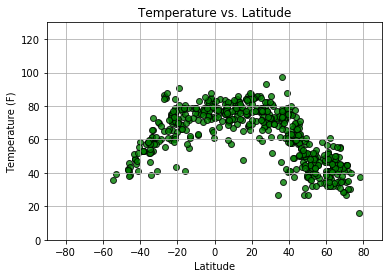

In [6]:
#Temp vs Lat

plt.scatter(lat_s, temp_s, marker="o", facecolors="green", edgecolors="black", alpha=0.80)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(True)
plt.ylim(0,130)
plt.xlim(-90,90)

#130
plt.savefig("Temperature vs Lat.png")
plt.show()

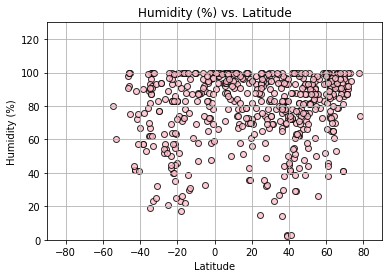

In [7]:
#Humidity vs Lat

plt.scatter(lat_s, humidity_s, marker="o", facecolors="pink", edgecolors="black", alpha=0.80)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.ylim(0,130)
plt.xlim(-90,90)

plt.savefig("Humidity vs Lat.png")
plt.show()

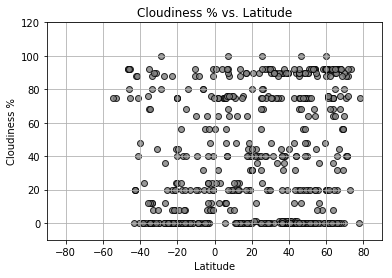

In [8]:
#Lat vs Clouds

plt.scatter(lat_s, cloud_s, marker="o", facecolors="grey", edgecolors="black", alpha=0.80)
plt.title("Cloudiness % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.grid(True)
plt.ylim(-10,120)
plt.xlim(-90,90)

plt.savefig("Cloudiness vs Lat.png")
plt.show()

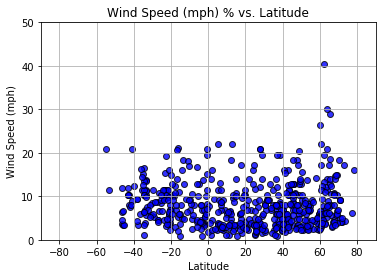

In [9]:
plt.scatter(lat_s, wind_s, marker="o", facecolors="blue", edgecolors="black", alpha=0.80)
plt.title("Wind Speed (mph) % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.ylim(0,50)
plt.xlim(-90,90)

plt.savefig("Wind Speed vs Lat.png")
plt.show()

In [ ]:
#Notes
#Your objective is to build a series of scatter plots to showcase the following relationships:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude


census_data = c.acs5.get(("B01003_001E", "B23025_005E"), {
                         'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B23025_005E": "Unemployment Count",
                                      "zip code tabulation area": "Zipcode"})

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

import openweathermapy as ow
settings = {"units": "metric", "appid": api_key}

# Get data for each city in cities.csv
weather_data = []
with open("../Resources/cities.csv") as cities_file:
    cities_reader = csv.reader(cities_file)
    cities = [city[0] for city in cities_reader]
    weather_data = [ow.get_current(city, **settings) for city in cities]

# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city
summary = ["main.temp", "coord.lat", "coord.lon"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

weather_data = pd.DataFrame(data, index=cities)
weather_data


#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Bujumbura"
#units = "metric"

#query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#temperature = weather_json["main"]["temp"]

#print(f"The temperature in Bujumbura is {temperature} C.")
#print(temperature)

# use list of units
#units = ["metric", "imperial"]

# set up list to hold two different temperatures
#temperatures = []

# loop throught the list of units and append them to temperatures list
#for unit in units:
    # Build query URL based on current element in units
    #query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit

    # Get weather data
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()

    # Get temperature from JSON response
    #temperature = weather_json["main"]["temp"]

    #temperatures.append(temperature)

# Report temperatures by accessing each element in the list
#print(
    #f"The temperature in Bujumbura is {temperatures[0]}C or {temperatures[1]}F.")